In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

Reading Data from the .csv file 

In [232]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [233]:
wine.shape

(1599, 12)

In [234]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [235]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking for the null values in the heat map

<AxesSubplot:>

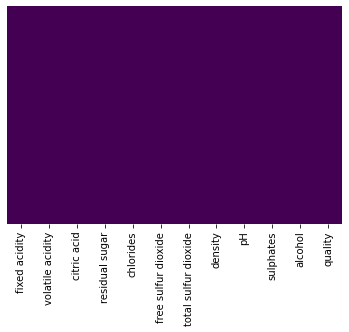

In [236]:
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Plotting all the columns in box plot to check for the outliers

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


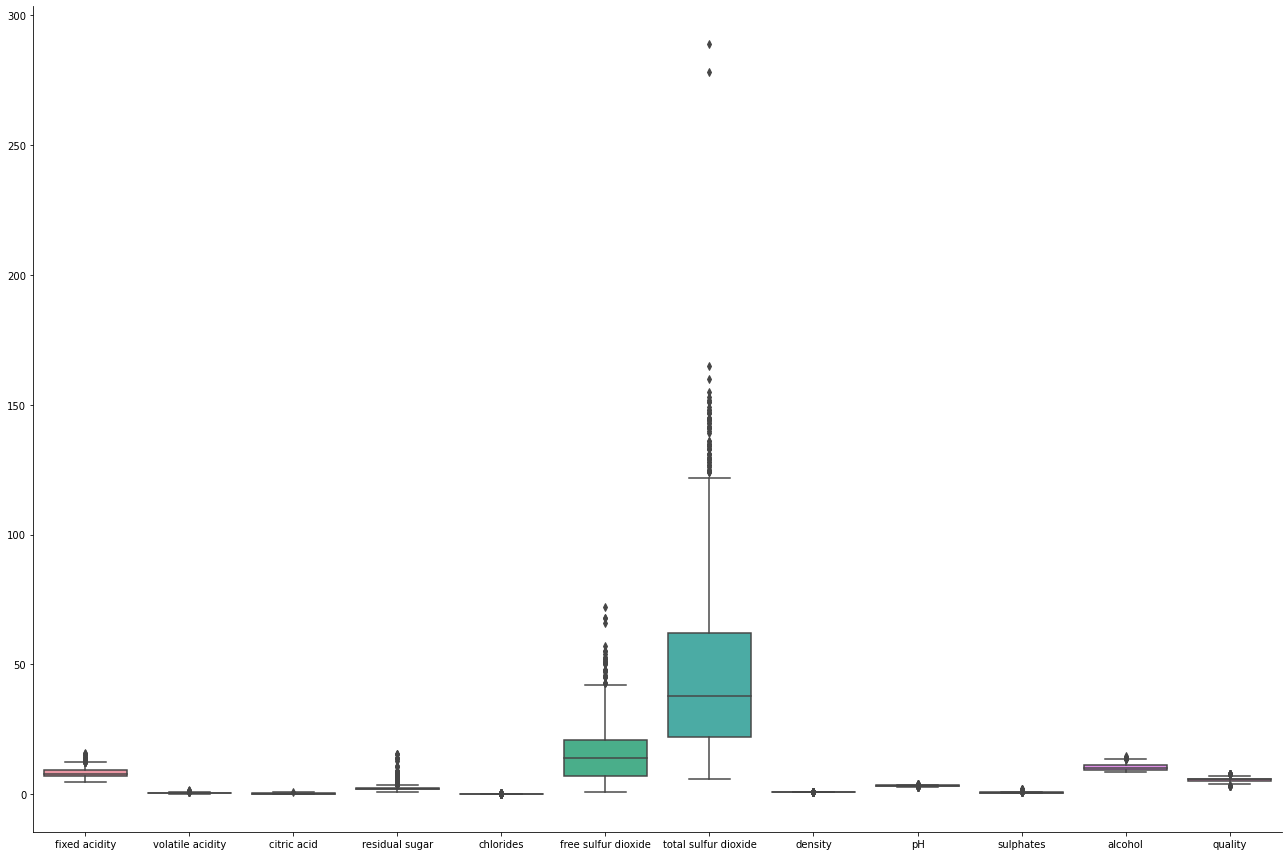

In [237]:
sns.factorplot(data=wine, kind='box', size=12, aspect=1.5)

Checking for the value outliers for the column 'total sulfur dioxide'

<AxesSubplot:ylabel='total sulfur dioxide'>

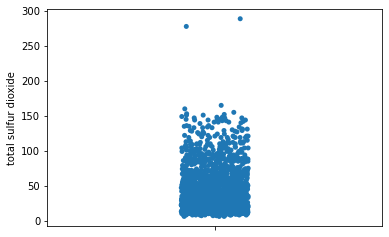

In [238]:
sns.stripplot(y='total sulfur dioxide',  data=wine)

Implementing IQR to remove outliers from 'total sulfur dioxide'

In [239]:
q1 = wine['total sulfur dioxide'].quantile(0.25)
q3 = wine['total sulfur dioxide'].quantile(0.75)
iqr = q3-q1
iqr
upper_lim_1 = q3+1.5*iqr
upper_lim_1

122.0

Checking for the value outliers for the column 'free sulfur dioxide'

<AxesSubplot:ylabel='free sulfur dioxide'>

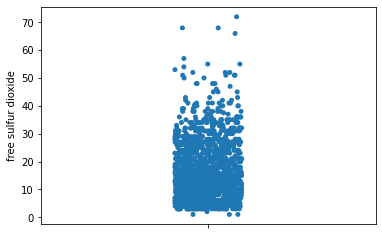

In [240]:
sns.stripplot(y='free sulfur dioxide', data=wine)

Implementing IQR to remove outliers from 'free sulfur dioxide'

In [241]:
q1 = wine['free sulfur dioxide'].quantile(0.25)
q3 = wine['free sulfur dioxide'].quantile(0.75)
iqr = q3-q1
iqr
upper_lim_2 = q3+1.5*iqr
upper_lim_2

42.0

Using the upper limit value obtained from the IQR

In [242]:
wine = wine[wine['total sulfur dioxide']<upper_lim_1]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Using the upper limit value obtained from the IQR

In [243]:
wine = wine[wine['free sulfur dioxide']<upper_lim_2]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Plotting both columns 'total sulfur dioxide' and 'free sulfur dioxide' in boxplot to check on the updated values

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


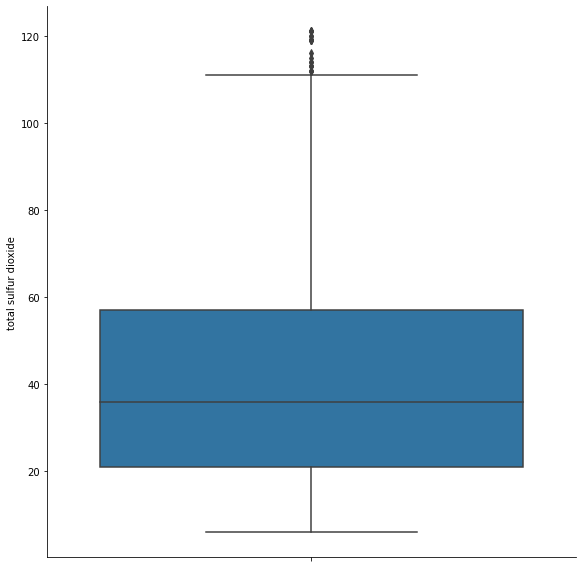

In [244]:
sns.factorplot(y= 'total sulfur dioxide', data=wine, kind='box', size=8)

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\amanm\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


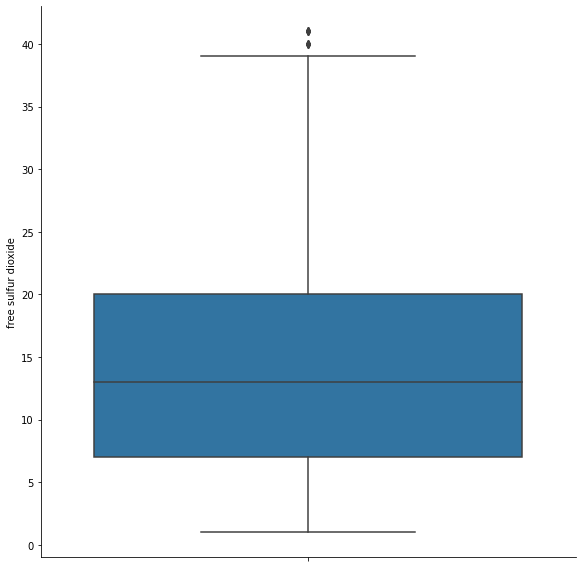

In [245]:
sns.factorplot(y= 'free sulfur dioxide', data=wine, kind='box', size=8)

Plotting a corelation heatmap tp understand the impact of each variable on quality

<AxesSubplot:>

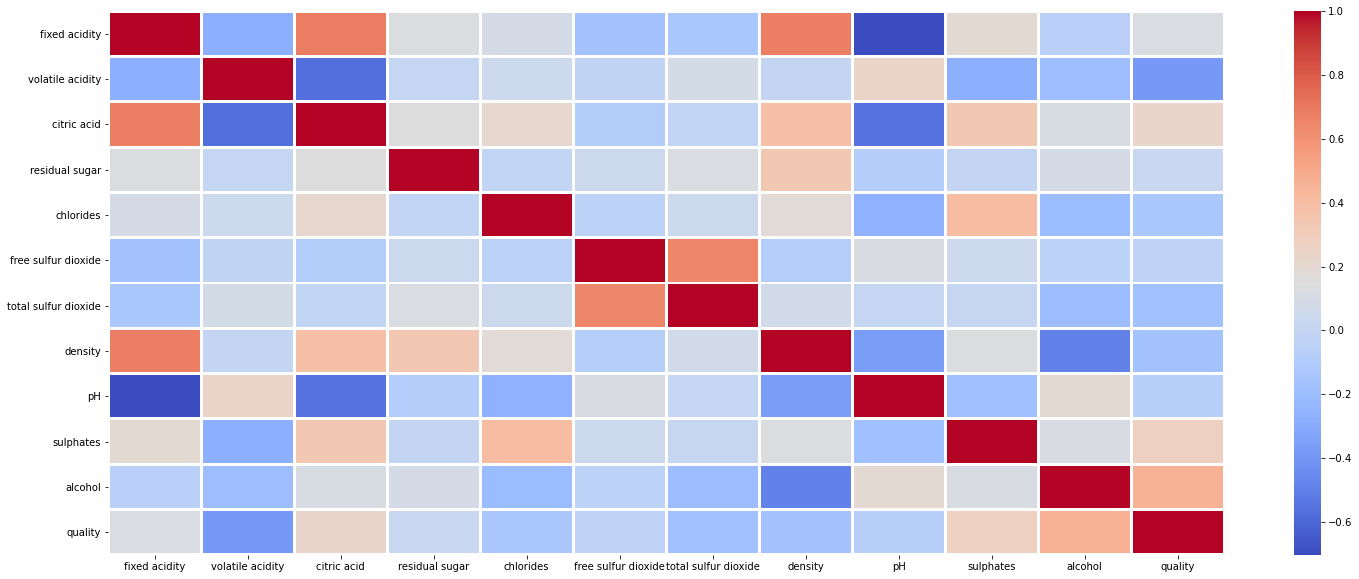

In [246]:
plt.figure(figsize=(25, 10))
sns.heatmap(wine.corr(), linewidths=2, cmap='coolwarm',linecolor='white' )

Plotting histplot to understand the data

<AxesSubplot:ylabel='Count'>

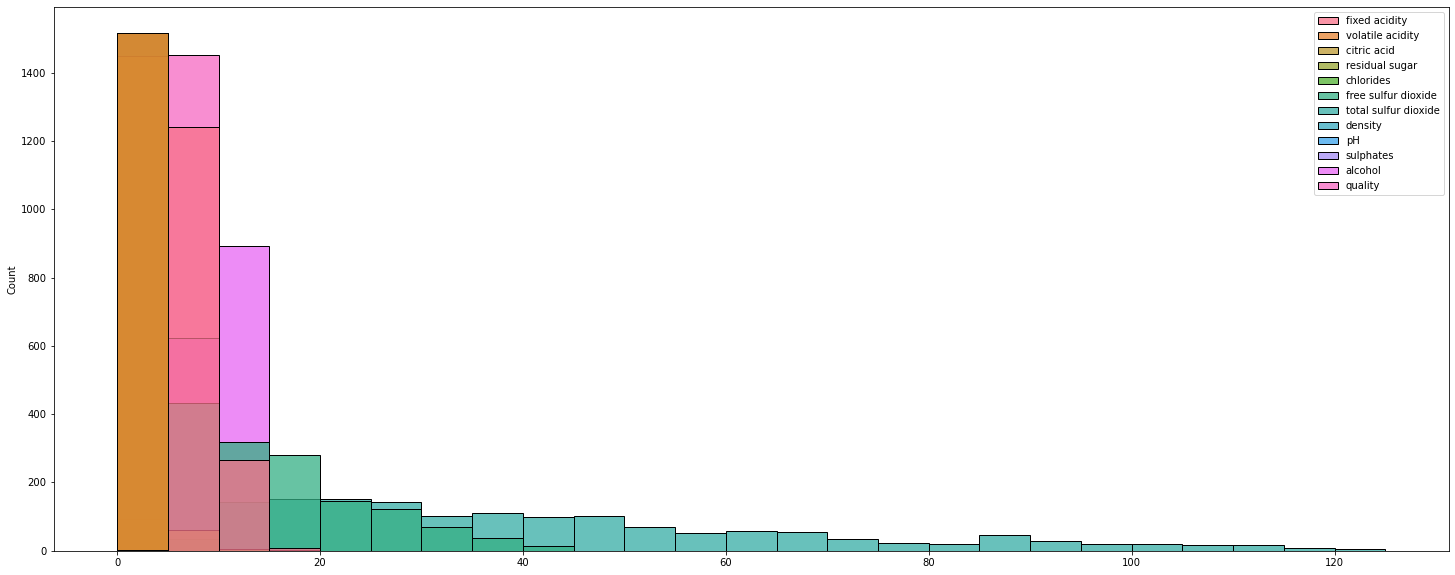

In [247]:
plt.figure(figsize=(25, 10))
sns.histplot(data=wine, bins=5, binwidth = 5, element='bars')

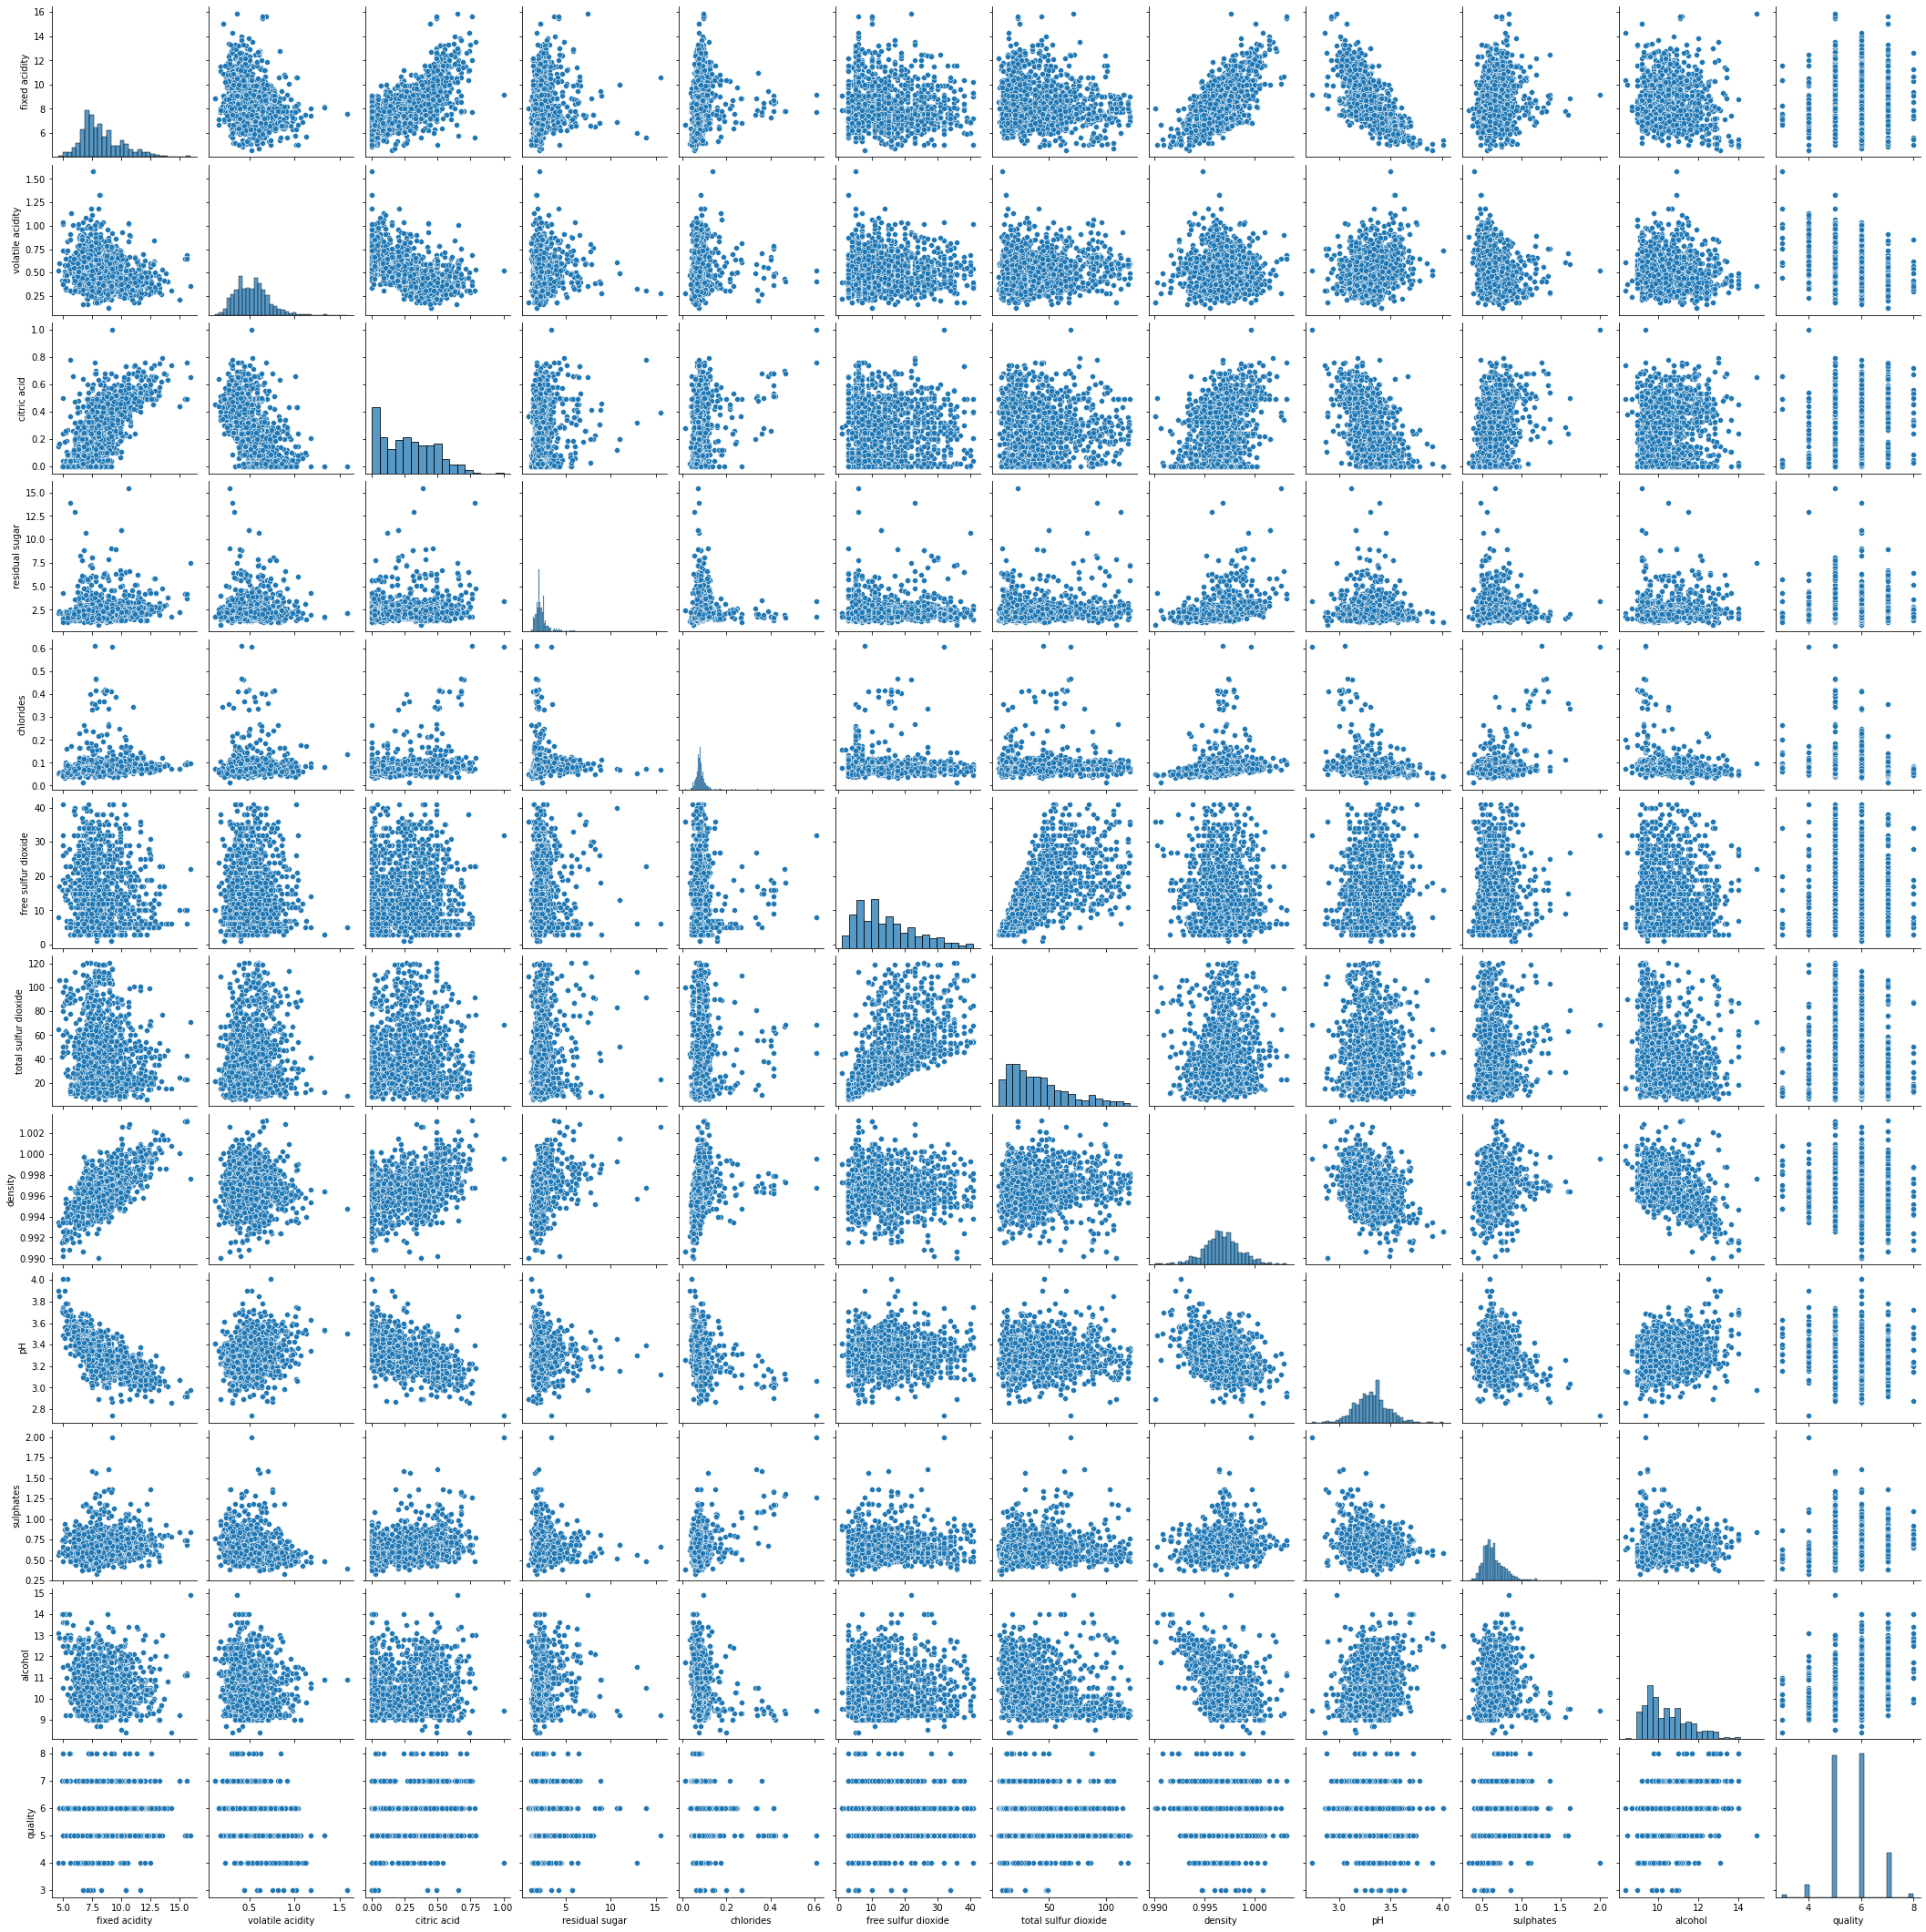

In [248]:
sns.pairplot(data=wine)

Breaking down the dataset into features and quality

In [249]:
quality = wine['quality']
features = wine.drop('quality',axis=1)

# Normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(features)
features

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [250]:
quality.replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True) # Replacing the values of output for model trainning
quality

C:\Users\amanm\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1516, dtype: int64

In [261]:
le = LabelEncoder()
quality_le = le.fit_transform(quality) # Using label encoder on the quality
quality_le = to_categorical(quality, 6) # Converting to Binary class
quality_le

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [262]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, quality_le, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1212, 11) (152, 11) (152, 11) (1212, 6) (152, 6) (152, 6)


### tf.estimator.DNNClassifier

In [251]:
feature_columns = [
	# "curb-weight" and "highway-mpg" are numeric columns.
	tf.feature_column.numeric_column(key="fixed acidity"),
	tf.feature_column.numeric_column(key="volatile acidity"),
	tf.feature_column.numeric_column(key="citric acid"),
	tf.feature_column.numeric_column(key="residual sugar"),
	tf.feature_column.numeric_column(key="chlorides"),
	tf.feature_column.numeric_column(key="free sulfur dioxide"),
	tf.feature_column.numeric_column(key="total sulfur dioxide"),
	tf.feature_column.numeric_column(key="density"),
	tf.feature_column.numeric_column(key="pH"),
	tf.feature_column.numeric_column(key="sulphates"),
	tf.feature_column.numeric_column(key="alcohol"),
]

In [252]:
model = tf.estimator.DNNClassifier(hidden_units=[1024, 512, 256],feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\amanm\\AppData\\Local\\Temp\\tmp1foh4h95', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [294]:
test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x={"x": X_test},
    y=input(Y_test)[1],
    num_epochs=1,
    shuffle=False
)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1.

AttributeError: 'dict' object has no attribute 'index'

In [297]:
accuracy_score = model.evaluate(input_fn=test_input_fn)["accuracy"]
accuracy_score

NameError: name 'test_input_fn' is not defined

### Implementing Keras

In [255]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=64,  activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='sigmoid')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [256]:
hist2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 1.5746 - accuracy: 0.3573 - val_loss: 1.3237 - val_accuracy: 0.4211
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 1.2534 - accuracy: 0.4068 - val_loss: 1.1606 - val_accuracy: 0.4211
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1956 - accuracy: 0.4769 - val_loss: 1.1236 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1611 - accuracy: 0.5322 - val_loss: 1.0825 - val_accuracy: 0.5197
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.5479 - val_loss: 1.0383 - val_accuracy: 0.5658
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.5586 - val_loss: 0.9991 - val_accuracy: 0.6118
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 1.0484 - accuracy: 0.5536 - val_loss: 0.9791 - val_accuracy: 0.5526
Epoch 8/100
3

Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.6081 - val_loss: 0.9302 - val_accuracy: 0.5724
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9165 - accuracy: 0.6155 - val_loss: 0.9194 - val_accuracy: 0.5724
Epoch 61/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.6106 - val_loss: 0.9130 - val_accuracy: 0.5921
Epoch 62/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9142 - accuracy: 0.6064 - val_loss: 0.9121 - val_accuracy: 0.5921
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.6089 - val_loss: 0.9133 - val_accuracy: 0.5855
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.6180 - val_loss: 0.9196 - val_accuracy: 0.6118
Epoch 65/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9043 - accuracy: 0.6097 - val_loss: 0.9329 - val_accuracy: 0.5658
Epoch 

In [257]:
model_2.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 0s/step - loss: 0.9343 - accuracy: 0.6118


0.6118420958518982

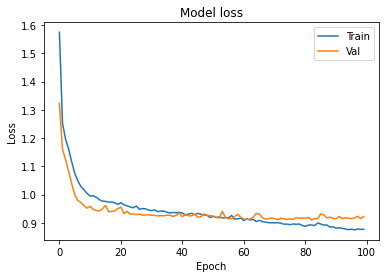

In [260]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

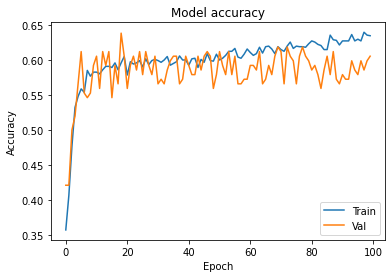

In [259]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Conclusion

For this model, the loss for both train and val data decreases with the number of epochs. There is a steep decline in the loss for both train and val data until 10 epochs after which the curve is flattened and moves in the range of 0.9 to 1.0. The model accuracy keeps increasing with the number of epochs for both train and val data and reaches its peak near 20 epochs and then the curve flattens with a little in range fluctuations. The accuracy from train data fluctuates at a range of 0.55 to 0.60 where as for validation data there is gradual increase in accuracy with the number of epochs.For both the accuracy and loss plots, the curve for train and validation data are similar.<br>
The implementation for the tf.estimator.DNNClassifier failed and it was returning an error.